In [23]:
import pandas as pd
import numpy as np

#Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#OVER SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#GridCV
from sklearn.model_selection import GridSearchCV
from sklearn_evaluation.plot import grid_search
import matplotlib.pyplot as plt

#K-fold
from sklearn.model_selection import KFold

#Cross Val Score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score



In [24]:
data = pd.read_csv('w2vjacnormalize.csv')
data = data.drop(['Unnamed: 0','Result'], axis=1)
data.head()

,Labeling,Product,W2Vec,Jaccard,Hasil
0,0,3 ayam mie telor super merah tepung terigu gar...,0.88778987 -0.06354413 0.24728766 0.28880234...,0.578947,0.503653
1,0,3 ayam mie telor super merah tepung terigu gar...,0.57615969 -0.04161003 -0.01158402 0.05458934...,0.521739,0.427676
2,0,3 ayam mie telor super merah tepung terigu gar...,0.57615969 -0.04161003 -0.01158402 0.05458934...,0.428571,0.401745
3,0,3 ayam mie telor super merah tepung terigu gar...,0.57615969 -0.04161003 -0.01158402 0.05458934...,0.333333,0.375238
4,0,3 ayam mie telor super merah tepung terigu gar...,0.57615969 -0.04161003 -0.01158402 0.05458934...,0.647059,0.462556


In [25]:
#RandomForest Normalisasi
RF = RandomForestClassifier()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [RF]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = np.asarray(data['Hasil'])
        X = X.reshape(-1, 1)
        y = np.asarray(data['Labeling'])
        y = y.reshape(-1, 1)

        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score Random Forest with Train size %.2f : %.4f" % (f, score_test1))
    
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision Random Forest with Train size %.2f : %.4f" % (f, score_test3))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall Random Forest with Train size %.2f : %.4f" % (f, score_test4))

            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy Random Forest with Train size %.2f : %.4f" % (f, score_test2))

F1-Score Random Forest with Train size 0.70 : 0.7022
Precision Random Forest with Train size 0.70 : 0.7074
Recall Random Forest with Train size 0.70 : 0.6971
Accuracy Random Forest with Train size 0.70 : 0.7050
F1-Score Random Forest with Train size 0.70 : 0.6016
Precision Random Forest with Train size 0.70 : 0.6153
Recall Random Forest with Train size 0.70 : 0.5885
Accuracy Random Forest with Train size 0.70 : 0.7437
F1-Score Random Forest with Train size 0.70 : 0.5272
Precision Random Forest with Train size 0.70 : 0.5583
Recall Random Forest with Train size 0.70 : 0.4995
Accuracy Random Forest with Train size 0.70 : 0.7858


In [26]:
#SVM Classifier Normalisasi
SVM = SVC()

ss = 1, 0.5, 0.33
train_size = [0.7]
clf = [SVM]
#, NB, SVM, LR, GBT
for clfs in clf :
    for s in ss:
        X = np.asarray(data['Hasil'])
        X = X.reshape(-1, 1)
        y = np.asarray(data['Labeling'])
        y = y.reshape(-1, 1)

        over = SMOTE(sampling_strategy=0.02)
        under = RandomUnderSampler(sampling_strategy=s)
        steps = [('o', over), ('u', under)]
        pipeline = Pipeline(steps=steps)
        
        X, y = pipeline.fit_resample(X, y)
        for f in train_size :
        
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
            clfs.fit(X_train, y_train)
            #score_test = rf.score(X_test, y_test)
            predict = clfs.predict(X_test)
            score_test1 = metrics.f1_score(y_test, predict)
            print("F1-Score SVM with Train size %.2f : %.4f" % (f, score_test1))
    
            score_test3 = metrics.precision_score(y_test, predict)
            print("Precision SVM with Train size %.2f : %.4f" % (f, score_test3))
     
            score_test4 = metrics.recall_score(y_test, predict)
            print("Recall SVM with Train size %.2f : %.4f" % (f, score_test4))

            score_test2 = metrics.accuracy_score(y_test, predict)
            print("Accuracy SVM with Train size %.2f : %.4f" % (f, score_test2))

F1-Score SVM with Train size 0.70 : 0.5865
Precision SVM with Train size 0.70 : 0.6873
Recall SVM with Train size 0.70 : 0.5115
Accuracy SVM with Train size 0.70 : 0.6402
F1-Score SVM with Train size 0.70 : 0.2802
Precision SVM with Train size 0.70 : 0.6562
Recall SVM with Train size 0.70 : 0.1782
Accuracy SVM with Train size 0.70 : 0.6991
F1-Score SVM with Train size 0.70 : 0.1769
Precision SVM with Train size 0.70 : 0.7731
Recall SVM with Train size 0.70 : 0.0999
Accuracy SVM with Train size 0.70 : 0.7778


In [27]:
#Smote for ss 0.02
RF = RandomForestClassifier()

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 3186, 1: 3186})
F1 Score =  0.7086614173228347
Precision =  0.7097791798107256
Recall =  0.7075471698113207
Accuracy =  0.7097280334728033


In [28]:
#Smote for ss 0.05
RF = RandomForestClassifier()

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
RF.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = RF.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = ", score_test1)
print("Precision = ",score_test2)
print("Recall = ",score_test3)
print("Accuracy = ",score_test4)

Counter({0: 7967, 1: 7967})
F1 Score =  0.7179377013963479
Precision =  0.7413487133984028
Recall =  0.6959600166597251
Accuracy =  0.7253712612424179


In [29]:
#Smote SVC for ss 0.02
SVM = SVC()

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.02)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
SVM.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = SVM.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = %.4f" % (score_test1))
print("Precision = %.4f" % (score_test2))
print("Recall = %.4f" % (score_test3))
print("Accuracy = %.4f" % (score_test4))

Counter({0: 3186, 1: 3186})
F1 Score = 0.5623
Precision = 0.6643
Recall = 0.4874
Accuracy = 0.6213


In [30]:
#Smote SVC for ss 0.05
SVM = SVC()

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
from collections import Counter
counter = Counter(y)
print(counter)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
SVM.fit(X_train, y_train)
#score_test = rf.score(X_test, y_test)
predict = SVM.predict(X_test)
score_test1 = metrics.f1_score(y_test, predict)
score_test2 = metrics.precision_score(y_test, predict)
score_test3 = metrics.recall_score(y_test, predict)
score_test4 = metrics.accuracy_score(y_test, predict)
print("F1 Score = %.4f" % (score_test1))
print("Precision = %.4f" % (score_test2))
print("Recall = %.4f" % (score_test3))
print("Accuracy = %.4f" % (score_test4))

Counter({0: 7967, 1: 7967})
F1 Score = 0.5767
Precision = 0.6548
Recall = 0.5152
Accuracy = 0.6202


Tuning Parameters

In [31]:
X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [1, 10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [80, 90],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
dataku = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='f1',
                          cv = 5, n_jobs = -1)

In [32]:
dataku.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90],
                         'n_estimators': [1, 10, 50, 100]},
             scoring='f1')

In [33]:
dataku.best_params_

{'criterion': 'gini', 'max_depth': 90, 'n_estimators': 50}

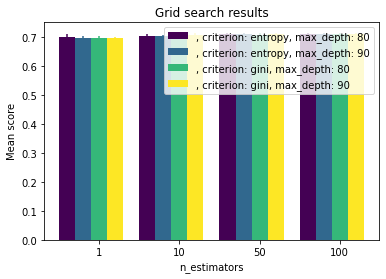

In [34]:
grid_search(dataku.cv_results_, change='n_estimators', kind='bar')
plt.show()

In [35]:
#Skor hasil tuning 
RF = RandomForestClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(max_depth = 90, n_estimators = 50, criterion='gini')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())

0.7308878912136805


In [43]:
#SVM
X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Create the parameter grid based on the results of random search 
param_grid = {
    'C': [1.0, 2.0],
    'kernel': ['linear', 'rbf'],
    'degree': [1, 2, 3, 4]
}
# Create a based model
SV = SVC()
# Instantiate the grid search model
dataku2 = GridSearchCV(estimator = SV, param_grid = param_grid, scoring='f1',
                          cv = 5)

In [44]:
dataku2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 2.0], 'degree': [1, 2, 3, 4],
                         'kernel': ['linear', 'rbf']},
             scoring='f1')

In [45]:
dataku2.best_params_

{'C': 2.0, 'degree': 1, 'kernel': 'linear'}

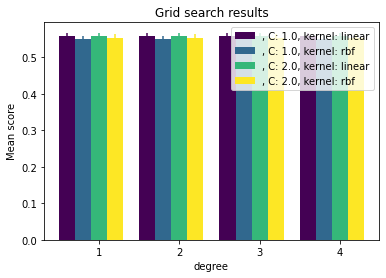

In [46]:
grid_search(dataku2.cv_results_, change='degree', kind='bar')
plt.show()

In [36]:
#RF 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier(max_depth = 90, n_estimators = 50, criterion='gini')
rf.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(rf, X, y, cv=kfold, scoring="f1").mean())

0.7300074955406014


In [47]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

sv = SVC(C = 2.0,
        kernel = 'linear',
        degree = 1
        )
sv.fit(X_train, y_train)
            
predict = rf.predict(X_test)

from sklearn.model_selection import cross_val_score
score_test = metrics.f1_score(y_test, predict)
print(cross_val_score(sv, X, y, cv=kfold, scoring="f1").mean())

0.5669744642289839


Perbandingan Performa Terbaik

In [38]:
#Model Default

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#
RF = RandomForestClassifier()

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.73341919 0.72188205 0.71592024 0.73368146 0.73453608]
0.7275793323433735
[0.73399807 0.72211476 0.71545247 0.73344209 0.73412826]
0.7280742075095124
[0.73389175 0.72170268 0.71545247 0.73385519 0.73494364]
0.727770457962463
[0.73301127 0.72188205 0.71349232 0.73368146 0.73518041]
0.727735106070602


In [40]:
#Model dengan Tuning parameter RandomForest

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
RF = RandomForestClassifier(max_depth = 90, n_estimators = 50, criterion='gini')

#ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [RF]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.72247263 0.72857608 0.73102094 0.73116883 0.72958373]
0.7292887178956479
[0.72744845 0.72887439 0.73036649 0.73210236 0.73045137]
0.7290146676545914
[0.72399356 0.73011734 0.73126023 0.73251295 0.7322335 ]
0.7283487148094847
[0.72105772 0.72869736 0.72971204 0.73316062 0.73320659]
0.7291992643384984


In [ ]:
#Model Default SVM

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
SVM = SVC()

#ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [SVM]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

In [ ]:
[0.54558663 0.54048059 0.5496988  0.568      0.57787482]
0.5563281674983396

In [49]:
#Model dengan Tuning parameter SVM

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
    
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

#Node2Vec
SVM = SVC(C= 2.0, degree= 1, kernel= 'linear')

ss = 1, 0.5, 0.33
train_size = [0.8, 0.75, 0.7, 0.6]
clf = [SVM]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#, NB, SVM, LR, GBT
for clfs in clf :
    for f in train_size :
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
        clfs.fit(X_train, y_train)
        #score_test = rf.score(X_test, y_test)
        predict = clfs.predict(X_test)
        score_test = metrics.f1_score(y_test, predict)
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1"))
        print(cross_val_score(clfs, X, y, cv=kfold, scoring="f1").mean())

[0.56724549 0.53619115 0.57782299 0.56445514 0.56467316]
0.5620775842582613
[0.56724549 0.53619115 0.57782299 0.56445514 0.56467316]
0.5620775842582613
[0.56724549 0.53619115 0.57782299 0.56445514 0.56467316]
0.5620775842582613
[0.56724549 0.53619115 0.57782299 0.56445514 0.56467316]
0.5620775842582613


Model performa terbaik

In [41]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
RF = RandomForestClassifier(max_depth = 90, n_estimators = 50, criterion='gini')

In [42]:
kFold = 5
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="f1").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(RF, X, y, cv=kfold, scoring="recall").mean())

[0.72207792 0.73309609 0.73775773 0.72768582 0.72899558]
0.7293435728818317
[0.73235017 0.74239096 0.74082209 0.73737057 0.73258004]
0.7368516676840217
[0.76563574 0.75382568 0.73834197 0.75100402 0.74047773]
0.749786804598719
[0.68434032 0.71581601 0.73106547 0.70584538 0.71224363]
0.7106092016082446


In [50]:
#SVM
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)
        
over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
SVM = SVC(C= 2.0, degree= 1, kernel= 'linear')

In [51]:
kFold = 5
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="f1").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="accuracy"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="accuracy").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="precision"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="precision").mean())
print(cross_val_score(SVM, X, y, cv=kfold, scoring="recall"))
print(cross_val_score(SVM, X, y, cv=kfold, scoring="recall").mean())

[0.56936813 0.56005491 0.55141477 0.55490128 0.56626917]
0.5604016509744572
[0.60652651 0.59774082 0.59209288 0.5967995  0.60043942]
0.5987198267601176
[0.64263566 0.61492087 0.59626866 0.61805556 0.62669683]
0.6197155155836221
[0.51109741 0.51417769 0.51283697 0.50345695 0.51646986]
0.5116077754424913


Visualisasi ROC

In [53]:
#Normalisasi
X = np.asarray(data['Hasil'])
X = X.reshape(-1, 1)
y = np.asarray(data['Labeling'])
y = y.reshape(-1, 1)

over = SMOTE(sampling_strategy=0.05)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
        
X, y = pipeline.fit_resample(X, y)
# Membandingkan Decision Tree dengan berbagai train size
RF = RandomForestClassifier(max_depth = 90, n_estimators = 50, criterion='gini')
SVM = SVC(C= 2.0, degree= 1, kernel= 'linear', probability=True)

train_size = [0.7]
rforest = [RF, SVM]
for rf in rforest :
  for f in train_size :
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=f, random_state=42)
    
    rf.fit(X_train, y_train)
    #score_test = rf.score(X_test, y_test)
    predict = rf.predict(X_test)
    score_test1 = metrics.f1_score(y_test, predict)
    if rf == RF: print("F1-Score Random Forest with Train size %.2f : %.3f%%" % (f, score_test1*100))
    if rf == SVM: print("F1-Score SVM with Train size %.2f : %.3f%%" % (f, score_test1*100))

F1-Score Random Forest with Train size 0.70 : 71.624%
F1-Score SVM with Train size 0.70 : 57.802%


In [54]:
rf_probs1 = RF.predict_proba(X_test)
rf_probs1 = rf_probs1[:, 1]
svm_probs1 = SVM.predict_proba(X_test)
svm_probs1 = svm_probs1[:, 1]

In [55]:
rf_auc1 = roc_auc_score(y_test,rf_probs1)
svm_auc1 = roc_auc_score(y_test,svm_probs1)

print('Random Forest = %.3f' % (rf_auc1))
print('SVM = %.3f' % (svm_auc1))

Random Forest = 0.800
SVM = 0.637


In [56]:
rf_rpr1, rf_tpr1, _ = roc_curve(y_test, rf_probs1)
nb_rpr1, nb_tpr1, _ = roc_curve(y_test, svm_probs1)

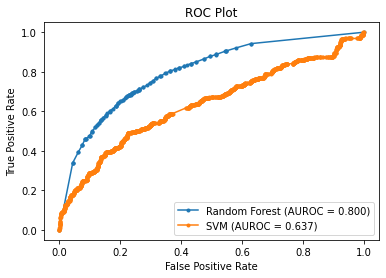

In [57]:
plt.plot(rf_rpr1, rf_tpr1, marker= '.', label = 'Random Forest (AUROC = %0.3f)' % rf_auc1)
plt.plot(nb_rpr1, nb_tpr1, marker= '.', label = 'SVM (AUROC = %0.3f)' % svm_auc1)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()